In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df = pd.read_csv('House Price India.csv')

In [3]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [5]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [6]:
df["Price"].describe()

count    1.461900e+04
mean     5.388063e+05
std      3.672294e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64

In [7]:
stats = round(df["Price"].describe().reset_index()["Price"], 2)

In [8]:
stats

0      14619.00
1     538806.28
2     367229.36
3      78000.00
4     320000.00
5     450000.00
6     645000.00
7    7700000.00
Name: Price, dtype: float64

In [9]:
stats = df["Price"].describe().reset_index()
stats["Price"] = round(stats["Price"],2)

In [10]:
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [11]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [12]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [13]:
df.groupby("condition of the house")["Price"].mean()

condition of the house
1    285497.222222
2    312891.400000
3    539336.477968
4    521082.494579
5    609954.024276
Name: Price, dtype: float64

In [14]:
df.groupby("condition of the house")["Price"].mean().sort_values(ascending=False)

condition of the house
5    609954.024276
3    539336.477968
4    521082.494579
2    312891.400000
1    285497.222222
Name: Price, dtype: float64

<Axes: xlabel='condition of the house'>

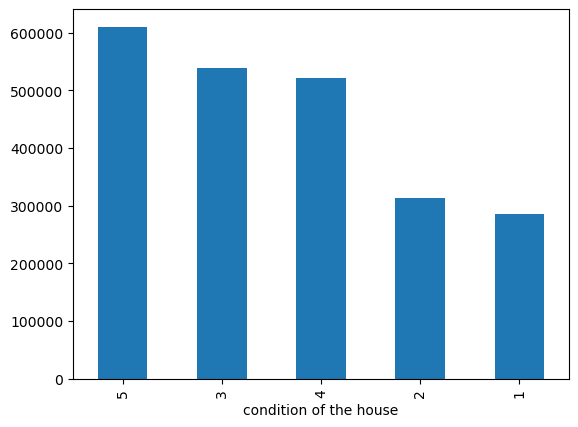

In [15]:
df.groupby("condition of the house")["Price"].mean().sort_values(ascending=False).plot(kind = "bar")

In [16]:
import matplotlib.pyplot as plt

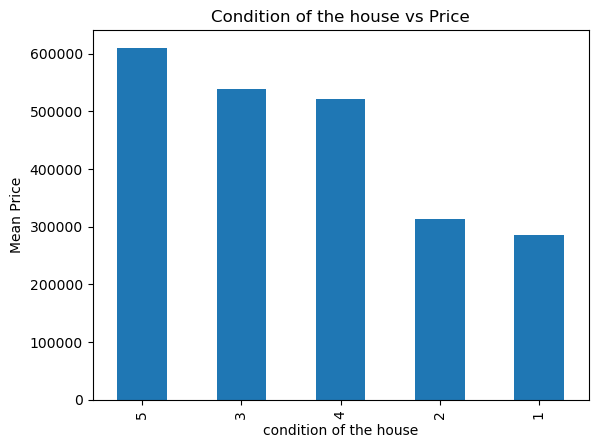

In [17]:
df.groupby("condition of the house")["Price"].mean().sort_values(ascending=False).plot(kind = "bar")
plt.title("Condition of the house vs Price")
plt.ylabel("Mean Price")
plt.show()

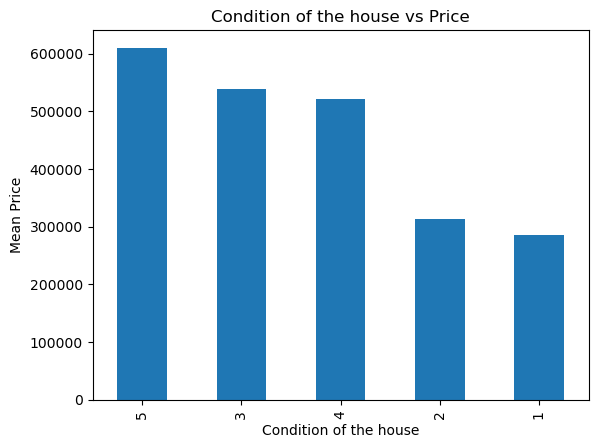

In [18]:
df.groupby("condition of the house")["Price"].mean().sort_values(ascending=False).plot(kind = "bar")
plt.title("Condition of the house vs Price")
plt.xlabel("Condition of the house")
plt.ylabel("Mean Price")
plt.show()

In [19]:
df.isnull().sum()


id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [20]:
df.dropna(inplace=True)  # Drop rows with missing values
# or
df.fillna(df.mean(), inplace=True)  # Impute missing values with mean


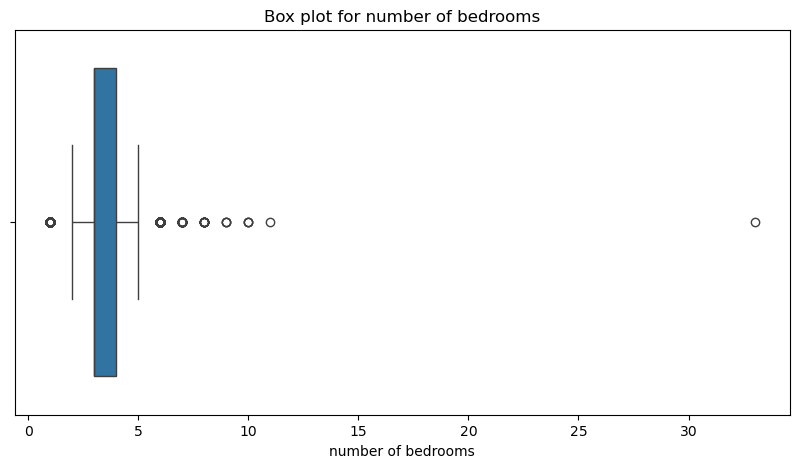

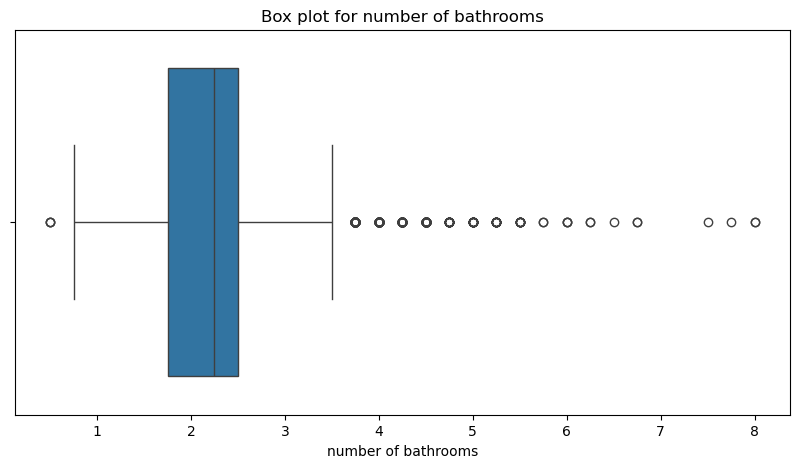

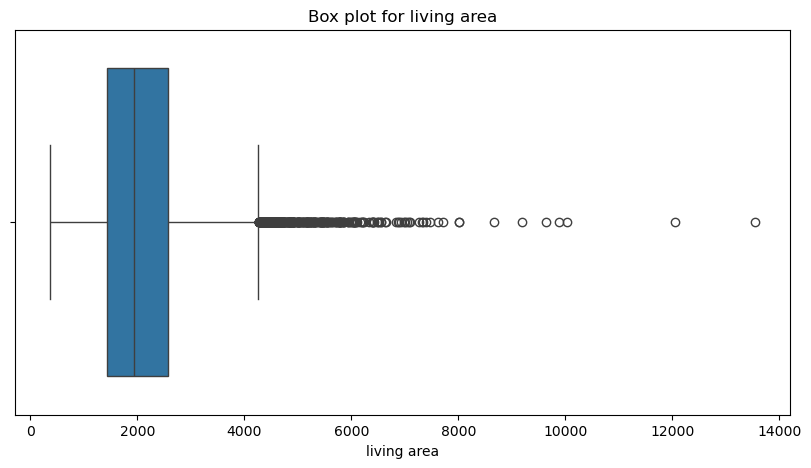

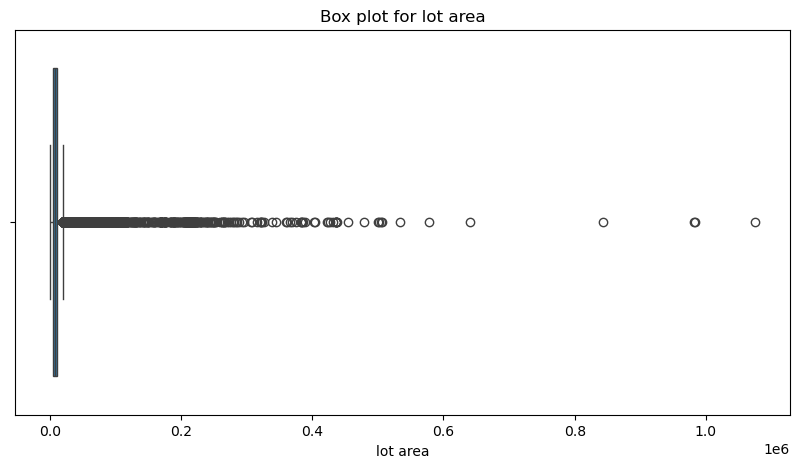

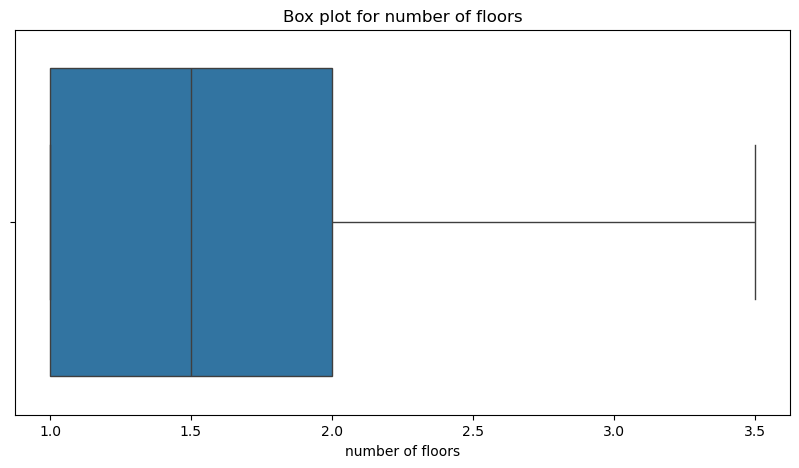

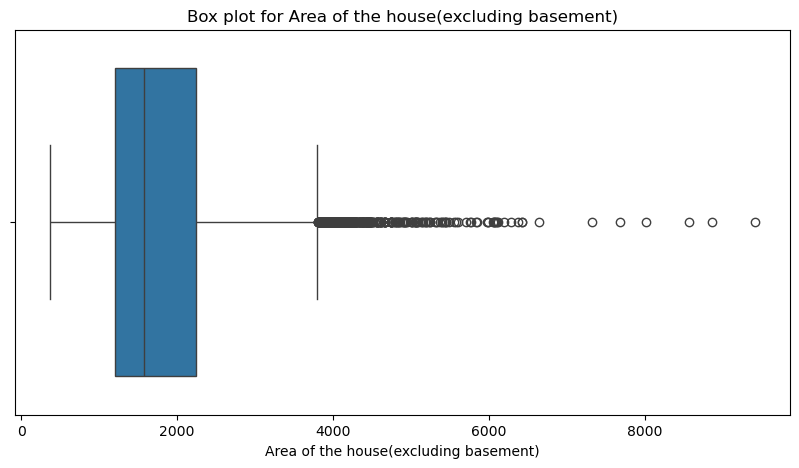

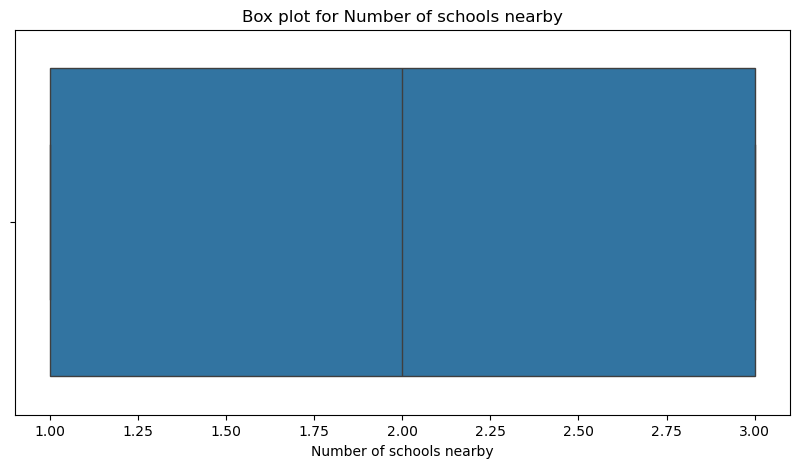

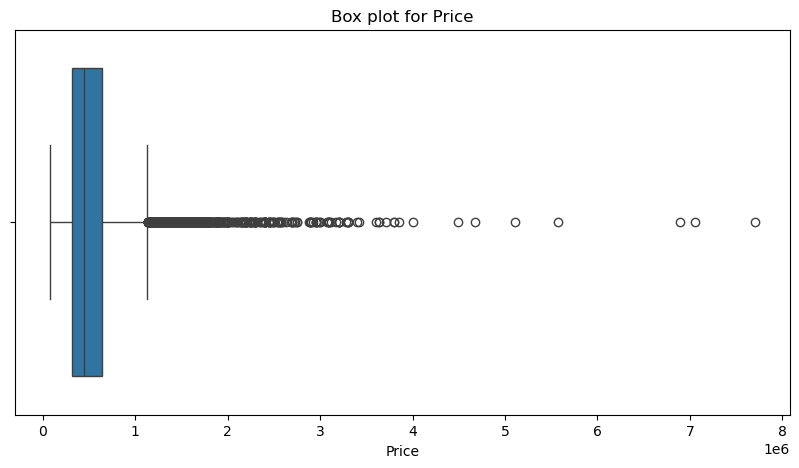

In [21]:
numeric_features = ['number of bedrooms', 'number of bathrooms','living area','lot area','number of floors','Area of the house(excluding basement)','Number of schools nearby','Price']

# Box Plot to Identify Outliers
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot for {feature}')
    plt.show()


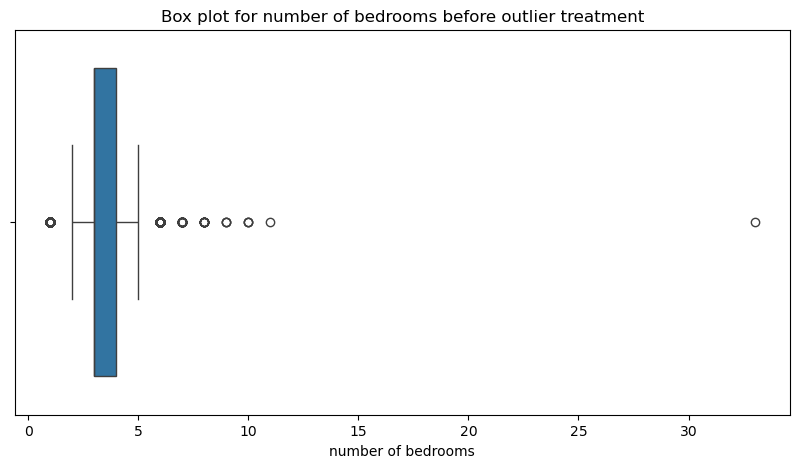

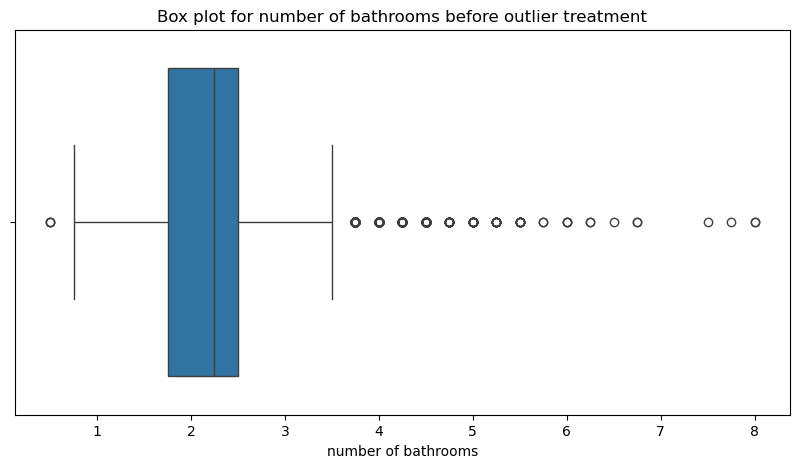

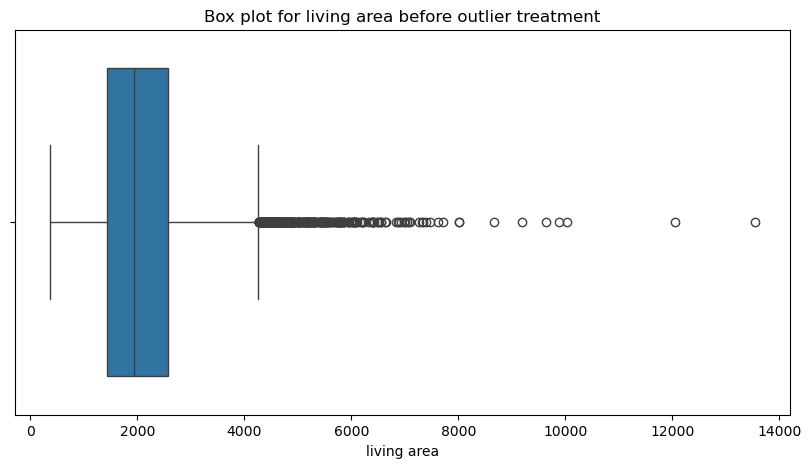

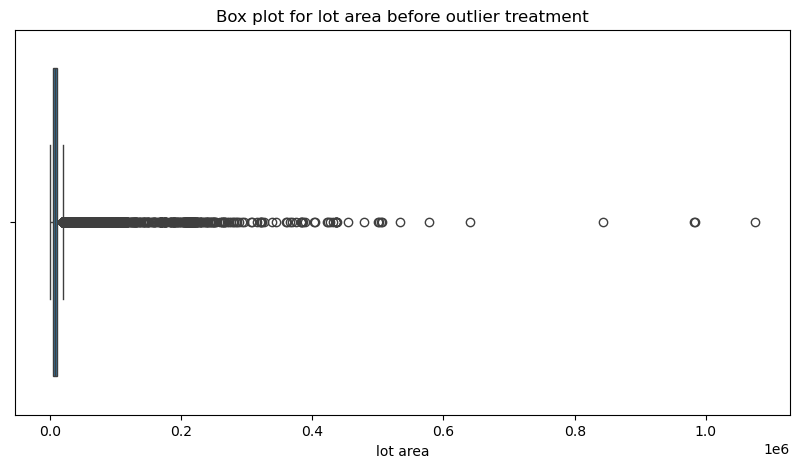

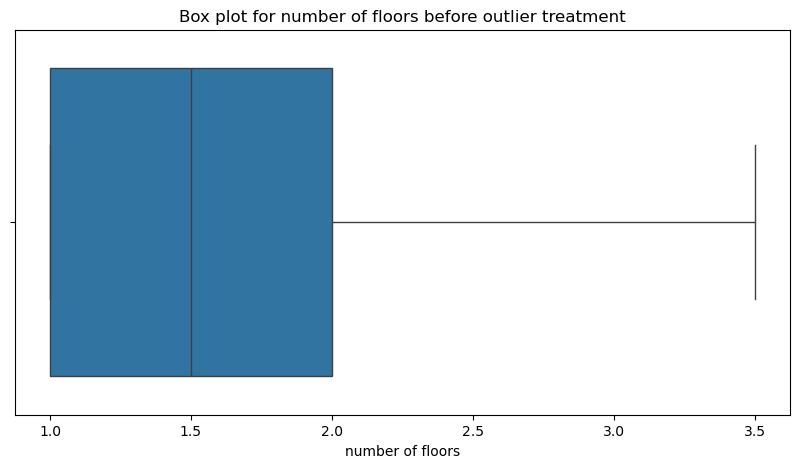

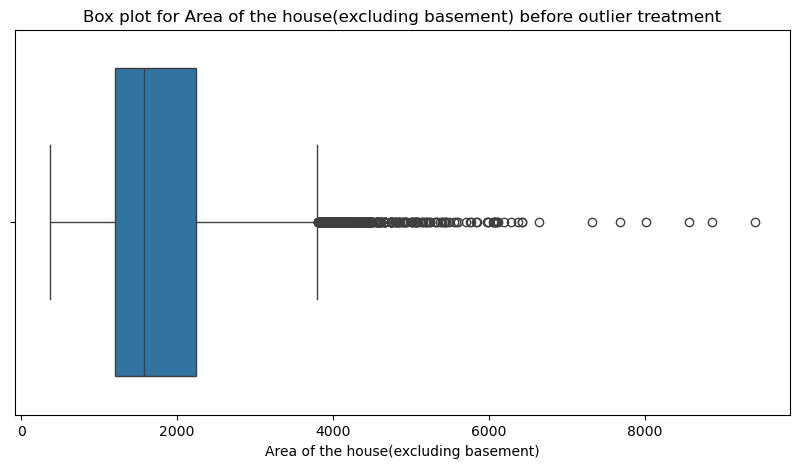

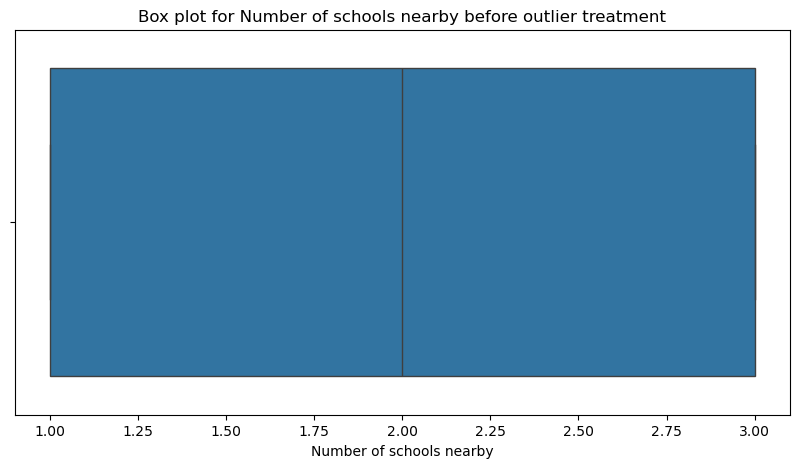

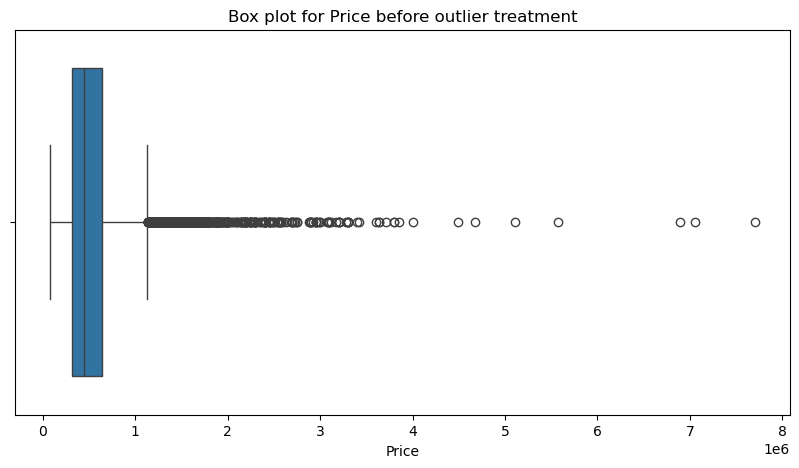

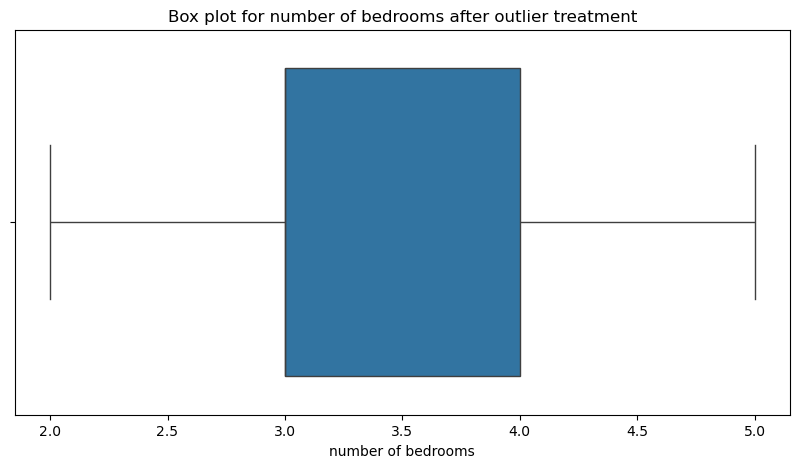

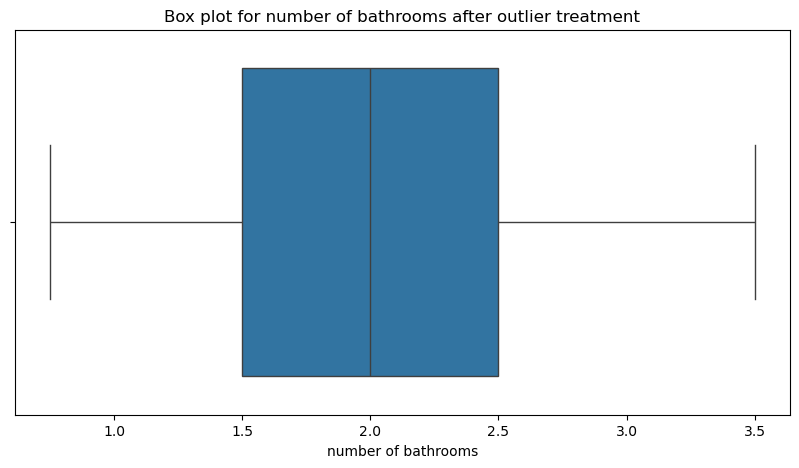

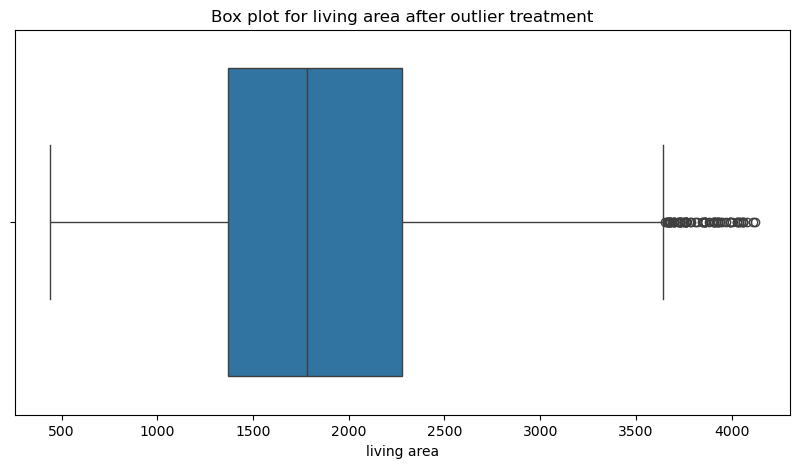

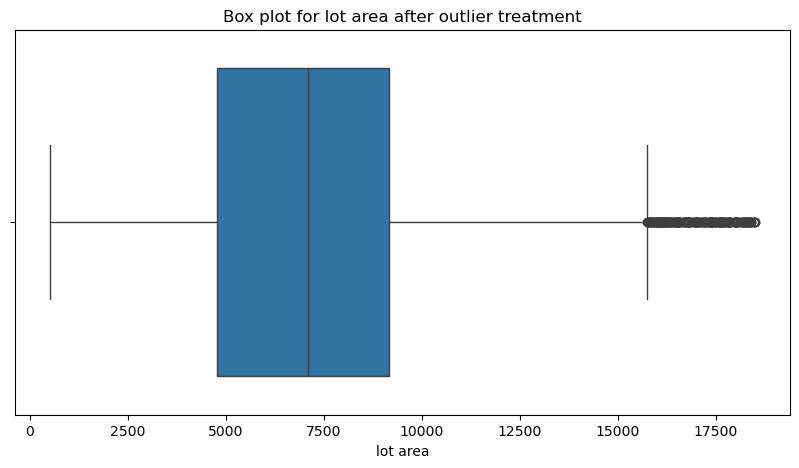

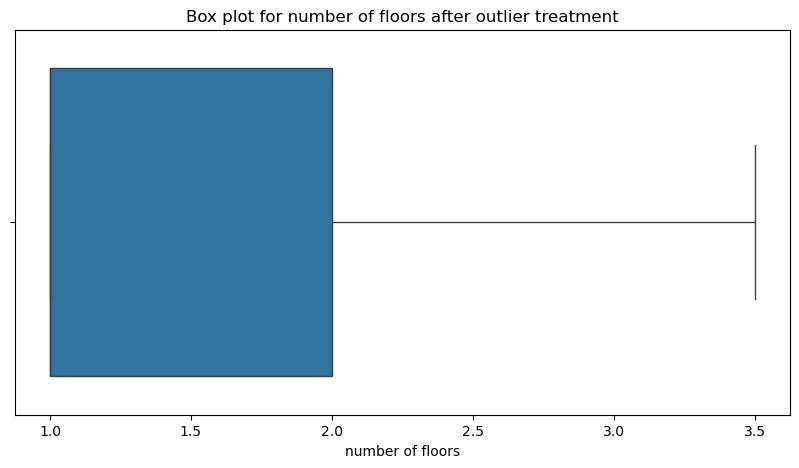

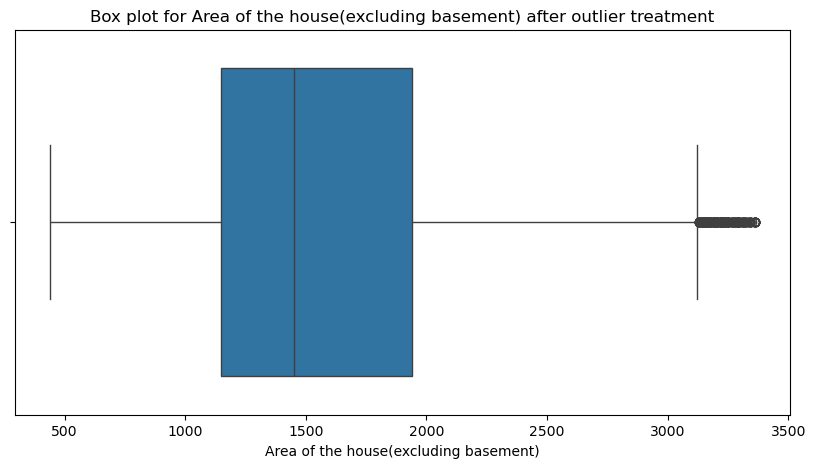

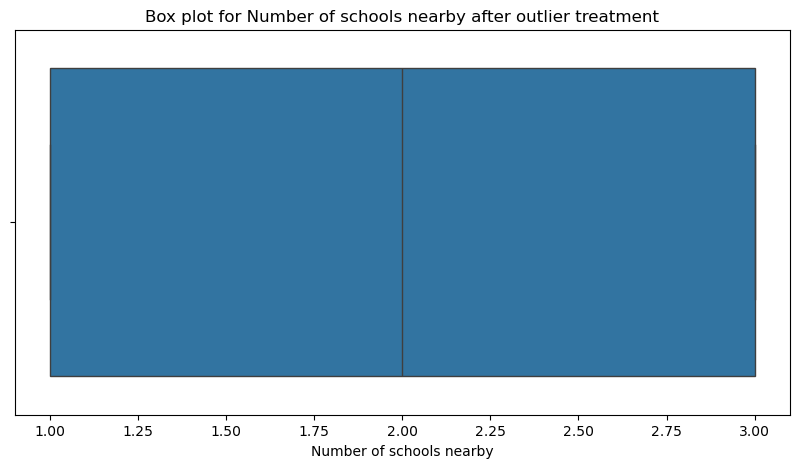

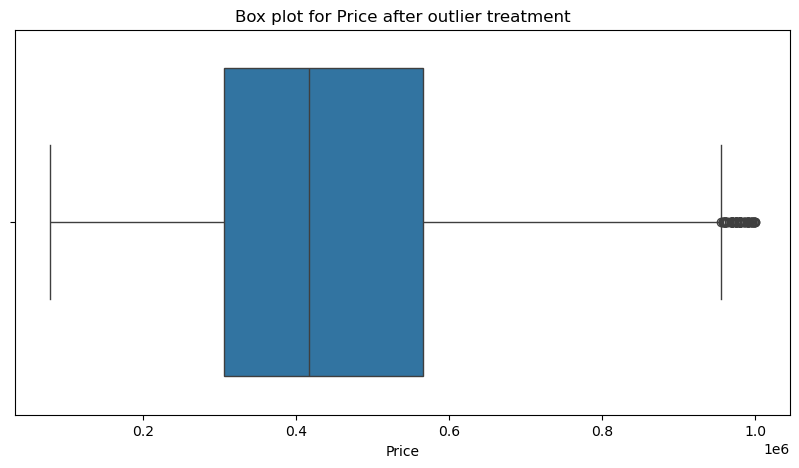

           id   Date  number of bedrooms  number of bathrooms  living area  \
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   
6  6762813599  42491                   3                 1.75         2240   
7  6762813600  42491                   3                 2.50         2390   
8  6762814461  42491                   4                 2.25         2200   

   lot area  number of floors  waterfront present  number of views  \
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   
6     10578               2.0                   0                0   
7      6550               1.0                   0                2   
8     11250               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
3                       4  ...    

In [22]:
# Function to display box plots
def display_boxplot(df, title):
    for feature in numeric_features:
        if feature in df.columns:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=df[feature])
            plt.title(f'Box plot for {feature} {title}')
            plt.show()
        else:
            print(f"{feature} not found in DataFrame")

# Display box plots before outlier treatment
display_boxplot(df, 'before outlier treatment')

# Remove Outliers using IQR
def remove_outliers_iqr(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply IQR-based outlier removal
for feature in numeric_features:
    df = remove_outliers_iqr(df, feature)

# Z-Score to Identify Outliers
if set(numeric_features).issubset(df.columns):
    z_scores = np.abs(zscore(df[numeric_features]))
    outliers = (z_scores > 3).all(axis=1)

    # Remove Outliers using Z-Score
    df = df[~outliers]
else:
    print("Some features are not found in the DataFrame for Z-Score calculation")

# Display box plots after outlier treatment
display_boxplot(df, 'after outlier treatment')

# Display the cleaned dataset
print(df.head())

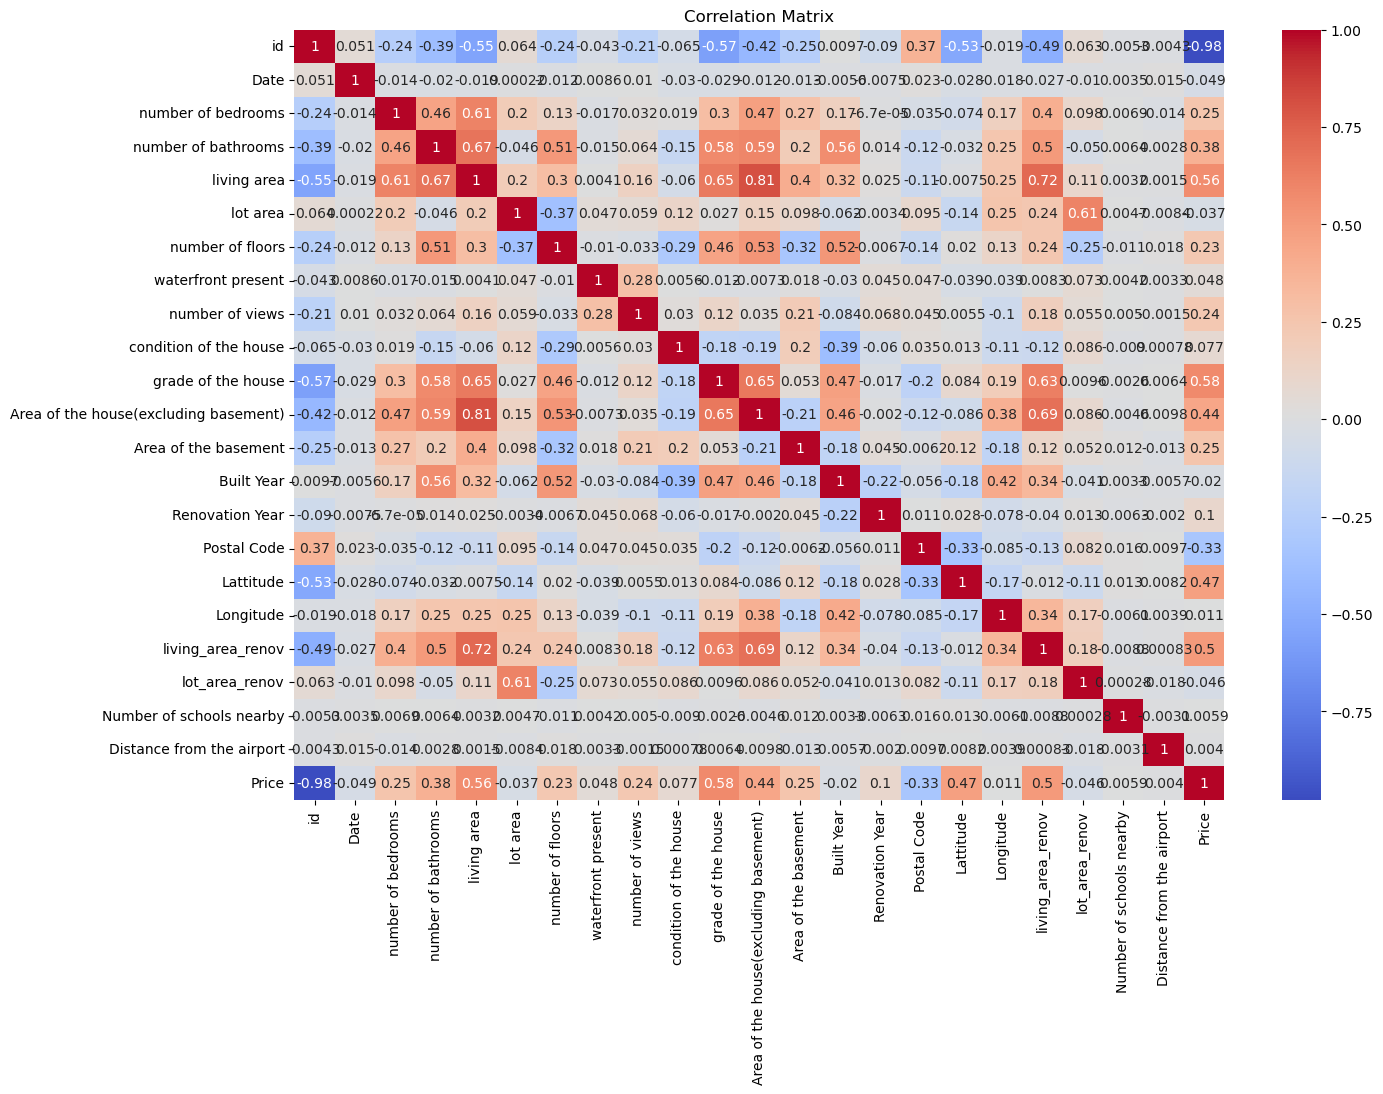

In [23]:
# Correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


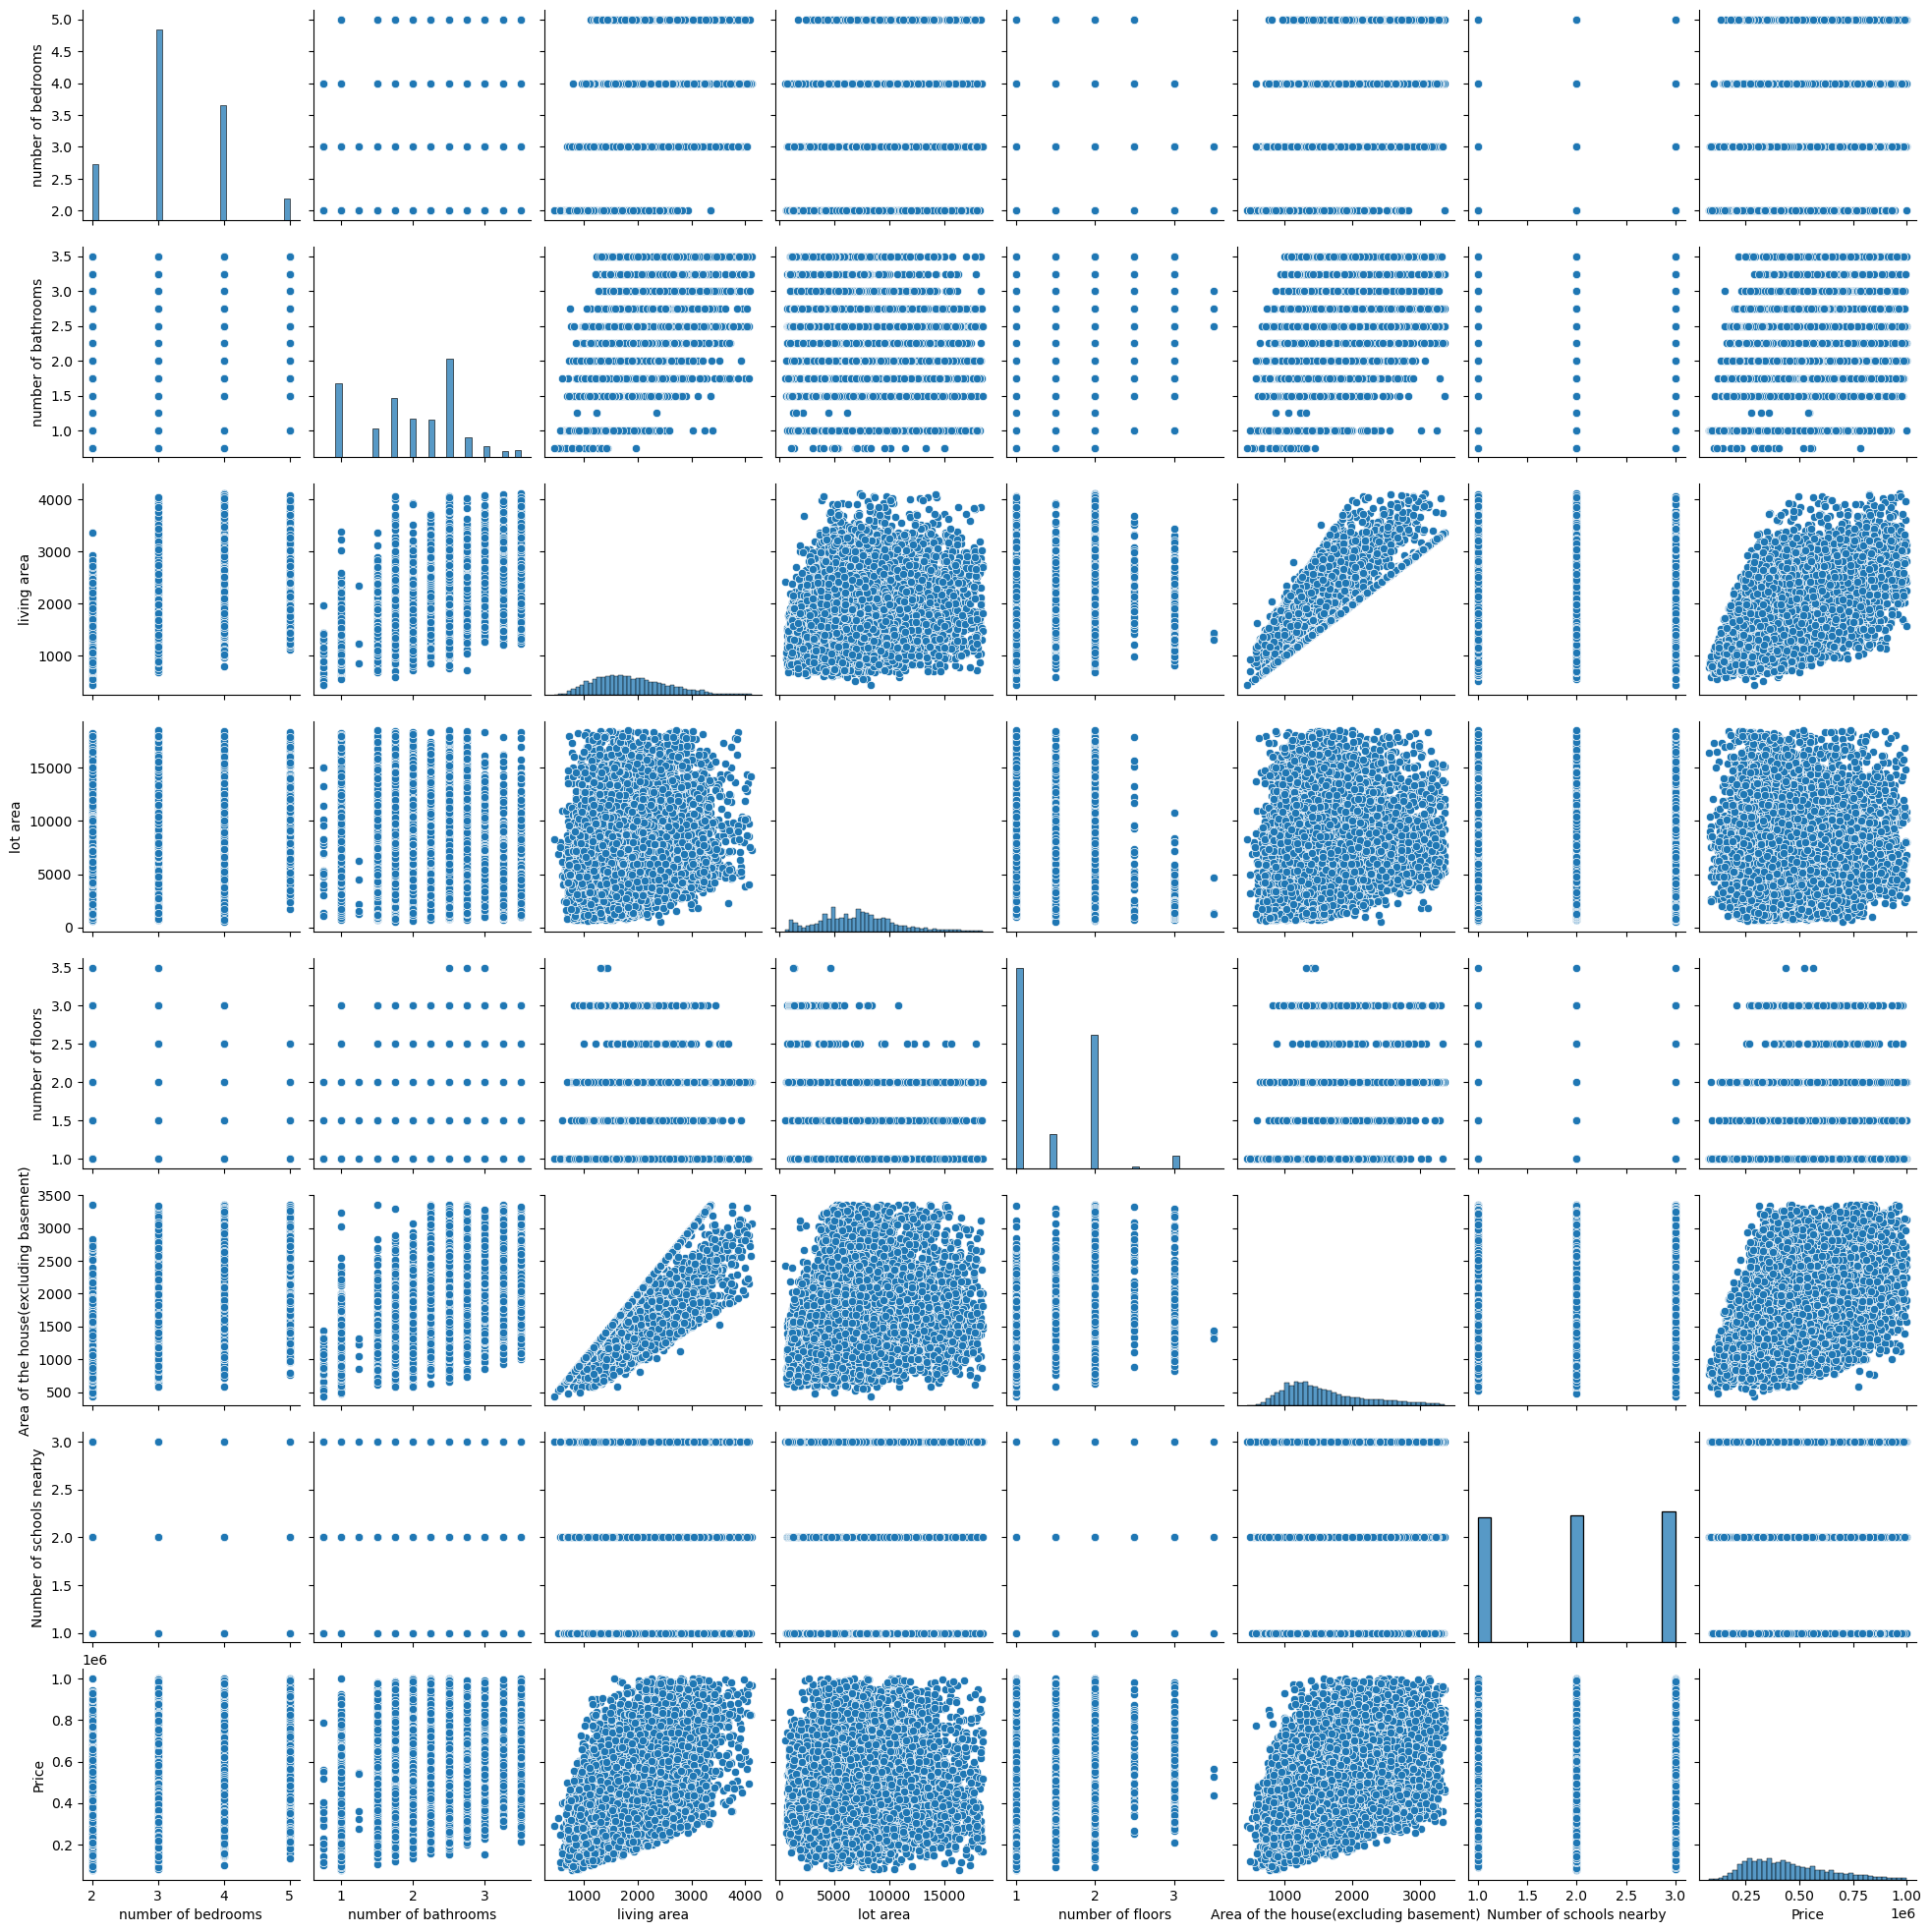

In [24]:
# Pairplot
sns.pairplot(df[numeric_features])
plt.show()

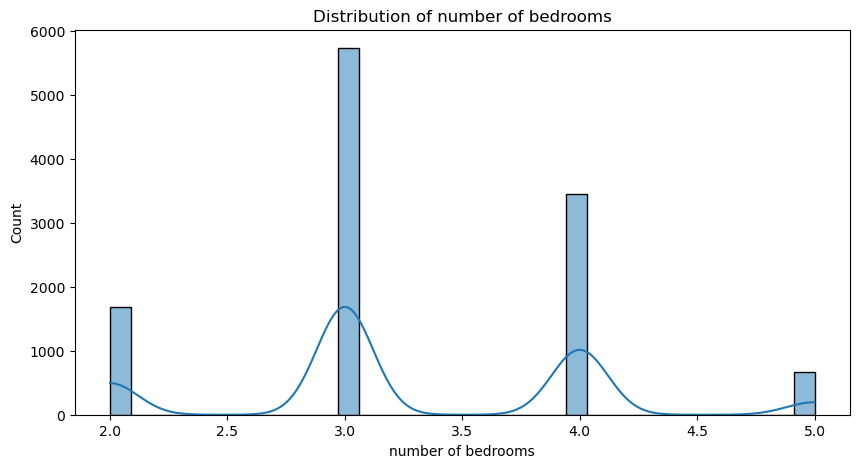

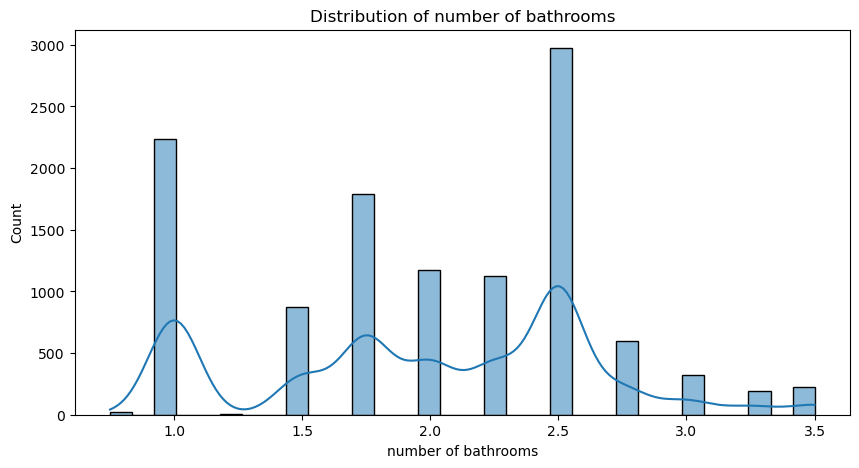

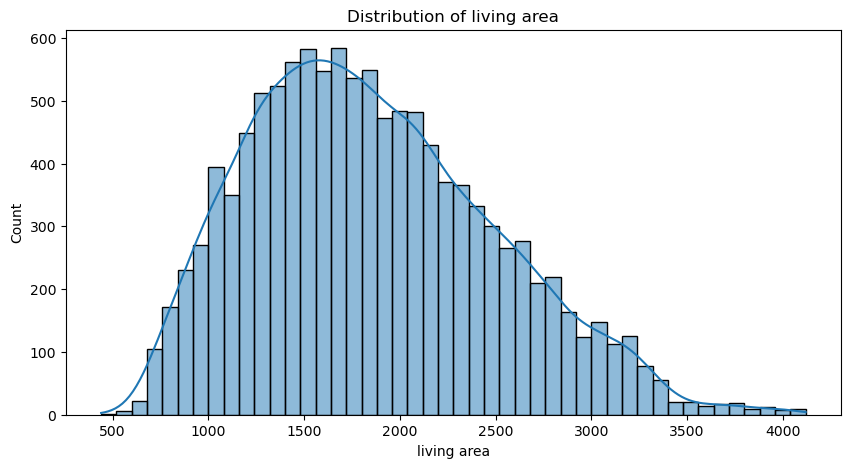

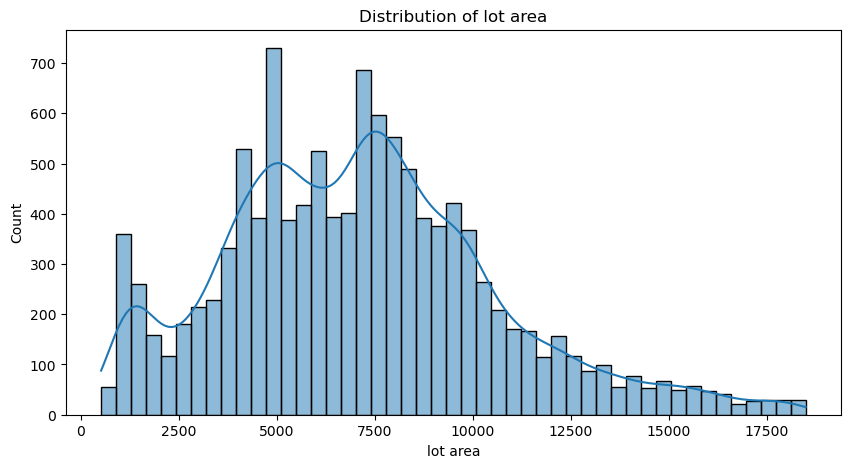

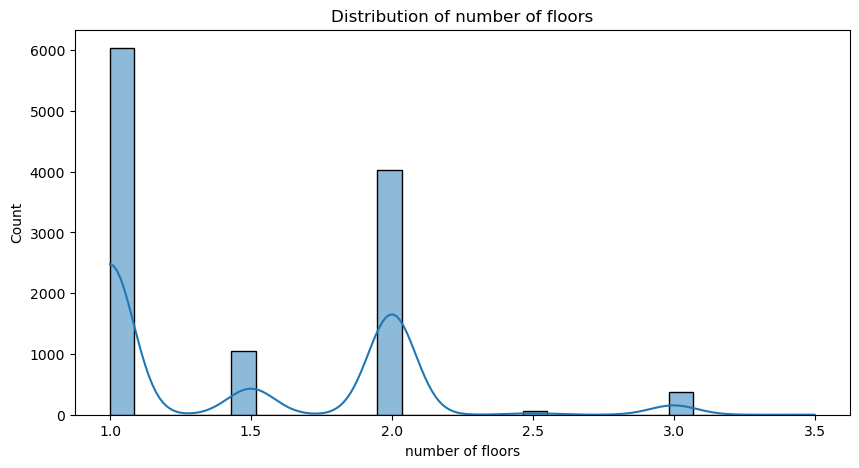

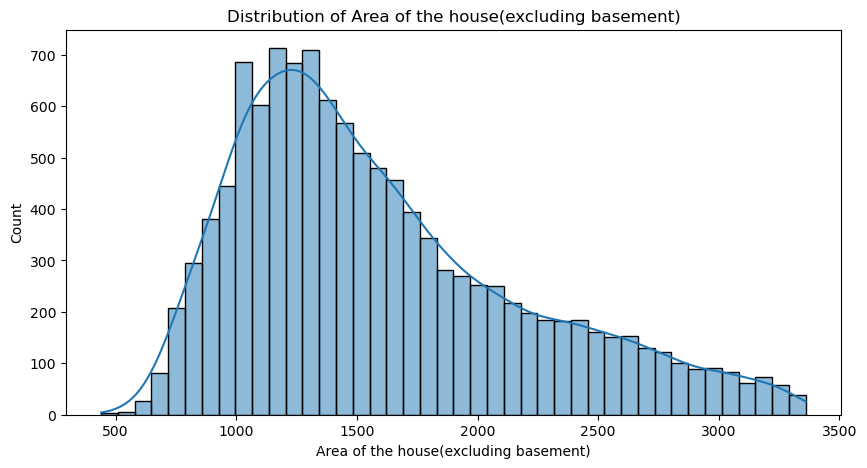

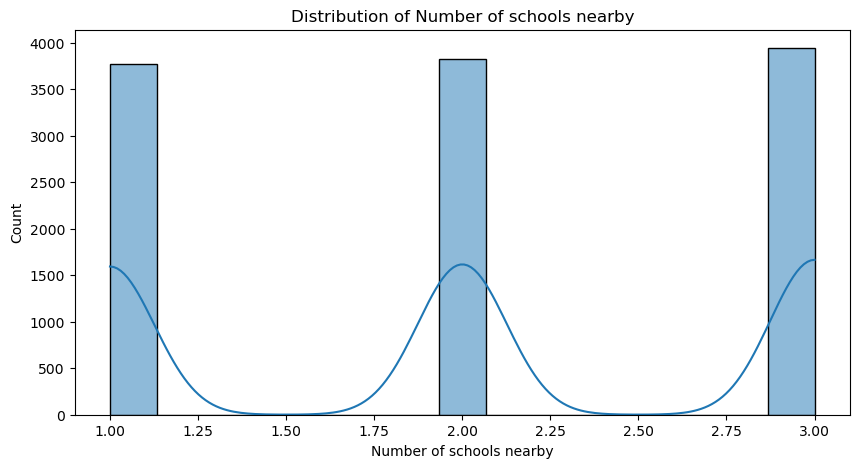

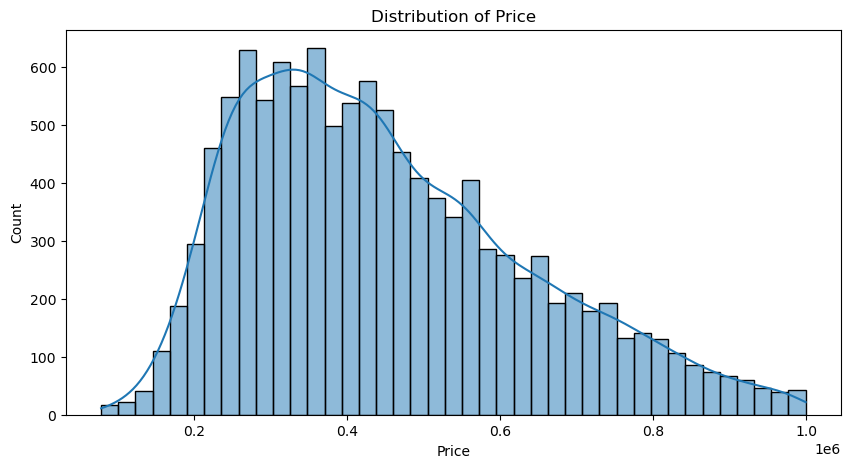

In [25]:
# Distribution Plots
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

# Handling Categorical Features
df = pd.get_dummies(df, drop_first=True)

# Scaling Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [27]:
# Import necessary libraries for model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the data into features and target variable
X = df[['number of bedrooms', 'number of bathrooms','living area','lot area','number of floors','Area of the house(excluding basement)','Number of schools nearby']]
y = df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
X

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Area of the house(excluding basement),Number of schools nearby
3,3,2.00,2710,4500,1.5,1880,1
4,3,2.50,2600,4750,1.0,1700,1
6,3,1.75,2240,10578,2.0,1550,3
7,3,2.50,2390,6550,1.0,1440,1
8,4,2.25,2200,11250,1.5,1300,2
...,...,...,...,...,...,...,...
14613,3,1.75,1590,7931,1.0,1190,1
14615,3,2.00,1680,7000,1.5,1680,3
14616,2,1.00,1070,6120,1.0,1070,2
14617,4,1.00,1030,6621,1.0,1030,3


In [29]:
y

3        805000
4        790000
6        750000
7        750000
8        698000
          ...  
14613    240000
14615    219200
14616    209000
14617    205000
14618    146000
Name: Price, Length: 11537, dtype: int64

In [30]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train_scaled, y_train)

# Best parameters and model evaluation
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)
print("Random Forest Regressor")
print("Best Parameters:", rf_grid_search.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Regressor
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
RMSE: 140034.00136674443
R²: 0.4248496083727473


In [31]:
# XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train_scaled, y_train)

# Best parameters and model evaluation
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_scaled)
print("XGBoost Regressor")
print("Best Parameters:", xgb_grid_search.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R²:", r2_score(y_test, y_pred_xgb))


XGBoost Regressor
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
RMSE: 139595.69160654955
R²: 0.4284444424503785


In [32]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
dt_params = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train_scaled, y_train)

# Best parameters and model evaluation
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)
print("Decision Tree Regressor")
print("Best Parameters:", dt_grid_search.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R²:", r2_score(y_test, y_pred_dt))

Decision Tree Regressor
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
RMSE: 154297.17001807873
R²: 0.3017188090185893


In [33]:
# Define the evaluation results for each model
data = {
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree'],

    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt))
    ],
    'R²': [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_dt)
    ]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

#Display the DataFrame in a table format
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+---------------+--------------------+--------------------+
|   |     Model     |        RMSE        |         R²         |
+---+---------------+--------------------+--------------------+
| 0 | Random Forest | 140034.00136674443 | 0.4248496083727473 |
| 1 |    XGBoost    | 139595.69160654955 | 0.4284444424503785 |
| 2 | Decision Tree | 154297.17001807873 | 0.3017188090185893 |
+---+---------------+--------------------+--------------------+


In [34]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Engineering: Polynomial Features and Feature Selection
poly = PolynomialFeatures(degree=2)
k_best = SelectKBest(score_func=f_regression, k=10)

# Model Stacking
estimators = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=10, min_samples_leaf=1, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=300, max_depth=7, learning_rate=0.01, subsample=0.8, random_state=42)),
]

stacked_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Pipeline with Feature Engineering and Model Stacking
pipeline = Pipeline([
    ('poly', poly),
    ('k_best', k_best),
    ('stacked_model', stacked_model)
])

pipeline.fit(X_train_scaled, y_train)
y_pred_stacked = pipeline.predict(X_test_scaled)

print("Stacked Model")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stacked)))
print("R²:", r2_score(y_test, y_pred_stacked))


Stacked Model
RMSE: 139176.84983166333
R²: 0.4318690783757523


In [35]:
import joblib

# Save the pipeline model
joblib.dump(pipeline, "stacked_model_pipeline.pkl")


['stacked_model_pipeline.pkl']